# K-Means Clustering and Visualizing It

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [9]:
#Get data for 3 types only 
type1_mask = df['Type 1'].isin(["Grass","Fire","Water"])

#remove unneeded columns  - we want the clustering algo to classify the data based on numerical measure only 
drop_cols = ['#',"Type 1","Type 2","Generation","Legendary"]



In [10]:
#preserve the original dataframe 
df_org = df.copy()

In [11]:
#apply filter and drop cols
df = df[type1_mask].drop(columns=drop_cols,axis=1)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


Objective: 
- build three clusters based on Attack and Defense
- Derive the centroids of the three clusters 
- add centroid and cluster info to the dataframe 
- plot the clusters 
- 

In [12]:
km = KMeans(n_clusters=3,random_state=30)


In [13]:
#apply kmeans on two columns, but it is recommended to apply it on multiple columns to get better clustering. ONly doing two for visualization purposes. 
    #sometimes a client will specify which attributes/features to use for clustering based on their problem statement 
df["cluster"] = km.fit_predict(df[['Attack','Defense']]) #giving clusters based on attack and defense 
df.head() #new column added for cluster


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
0,Bulbasaur,318,45,49,49,65,65,45,0
1,Ivysaur,405,60,62,63,80,80,60,0
2,Venusaur,525,80,82,83,100,100,80,2
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1
4,Charmander,309,39,52,43,60,50,65,0


In [14]:
#define the centroids - we expect 3 centroids 
centroids = km.cluster_centers_
print(centroids) #we get 6 values because they are coordinates based on x1 and x2 

print()
print(centroids[0])

[[ 49.875       48.075     ]
 [112.27083333 102.47916667]
 [ 79.80188679  74.38679245]]

[49.875 48.075]


In [15]:
cent_x = [i[0] for i in centroids] #gives every results in the x coordinates 
cent_y = [i[1] for i in centroids] #gives every results in the x coordinates 
print(cent_x)
print(cent_y)


[49.874999999999964, 112.27083333333329, 79.80188679245283]
[48.074999999999974, 102.47916666666664, 74.38679245283018]


In [16]:
#map the centroid to the cluster in the dataset based on index positions 
df['centx'] = df['cluster'].map({
    0:cent_x[0],
    1:cent_x[1],
    2:cent_x[2]
})

df['centy'] = df['cluster'].map({
    0:cent_y[0],
    1:cent_y[1],
    2:cent_y[2]
})

df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,centx,centy
0,Bulbasaur,318,45,49,49,65,65,45,0,49.875000,48.075000
1,Ivysaur,405,60,62,63,80,80,60,0,49.875000,48.075000
2,Venusaur,525,80,82,83,100,100,80,2,79.801887,74.386792
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,112.270833,102.479167
4,Charmander,309,39,52,43,60,50,65,0,49.875000,48.075000


In [17]:
#optional assign each cluster with a custom cluster and add to dataset
my_cust_col = ['#E4080A','#FFDE59','#0E05FC']

df['clust_col'] = df['cluster'].map({
    0:my_cust_col[0],
    1:my_cust_col[1],
    2:my_cust_col[2]
})

df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,centx,centy,clust_col
0,Bulbasaur,318,45,49,49,65,65,45,0,49.875000,48.075000,#E4080A
1,Ivysaur,405,60,62,63,80,80,60,0,49.875000,48.075000,#E4080A
2,Venusaur,525,80,82,83,100,100,80,2,79.801887,74.386792,#0E05FC
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,112.270833,102.479167,#FFDE59
4,Charmander,309,39,52,43,60,50,65,0,49.875000,48.075000,#E4080A


Plotting

Text(0, 0.5, 'Defense')

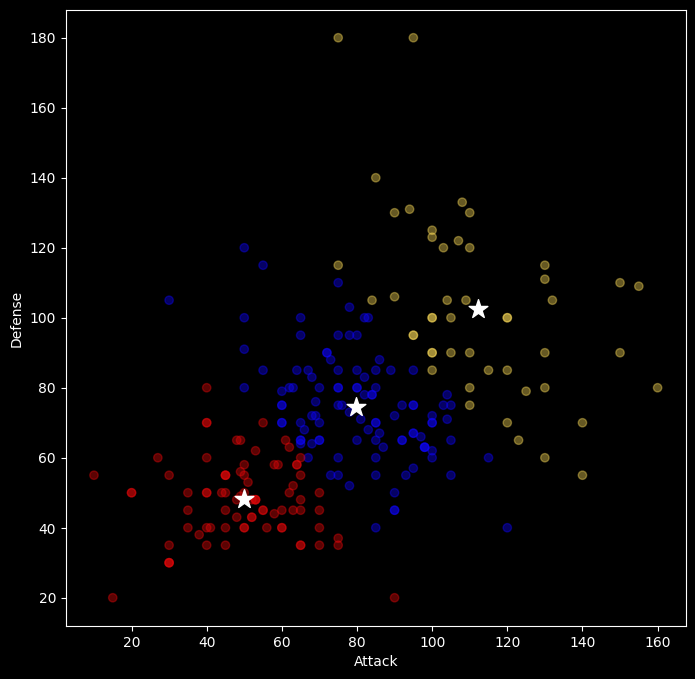

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.scatter(df['Attack'],df['Defense'],c=df['clust_col'],alpha=0.4) #alpha controls transparency to see overlap 
plt.scatter(cent_x,cent_y,marker='*',s=200,c='white')
plt.xlabel('Attack')
plt.ylabel('Defense')

# homework 
- add the previously dropped col (type 1) to the df and compare the outcome to the different clusters 